In [1]:
import shap
import xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pylab as pl
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# print the JS visualization code to the notebook
shap.initjs()

In [2]:
%run TunedXgboost.py

[0]	train-rmse:31.99972	test-rmse:32.83528
[1]	train-rmse:25.40380	test-rmse:26.32944
[2]	train-rmse:20.75134	test-rmse:21.66829
[3]	train-rmse:17.22710	test-rmse:18.22043
[4]	train-rmse:14.60135	test-rmse:15.57815
[5]	train-rmse:12.76516	test-rmse:13.81178
[6]	train-rmse:11.36952	test-rmse:12.51006
[7]	train-rmse:10.33373	test-rmse:11.49744
[8]	train-rmse:9.58205	test-rmse:10.83816
[9]	train-rmse:8.96155	test-rmse:10.29624
[10]	train-rmse:8.49281	test-rmse:9.84508
[11]	train-rmse:8.07781	test-rmse:9.45596
[12]	train-rmse:7.67884	test-rmse:9.09212
[13]	train-rmse:7.47593	test-rmse:8.94410
[14]	train-rmse:7.22210	test-rmse:8.74415
[15]	train-rmse:7.05721	test-rmse:8.55951
[16]	train-rmse:6.80771	test-rmse:8.34562
[17]	train-rmse:6.68759	test-rmse:8.24800
[18]	train-rmse:6.54077	test-rmse:8.16720
[19]	train-rmse:6.43135	test-rmse:8.09921
[20]	train-rmse:6.30481	test-rmse:7.97086
[21]	train-rmse:6.22061	test-rmse:7.91678
[22]	train-rmse:6.12253	test-rmse:7.83142
[23]	train-rmse:6.01816	te

[193]	train-rmse:2.49463	test-rmse:6.55469
[194]	train-rmse:2.48939	test-rmse:6.54275
[195]	train-rmse:2.48622	test-rmse:6.54342
[196]	train-rmse:2.48102	test-rmse:6.54477
[197]	train-rmse:2.47713	test-rmse:6.53977
[198]	train-rmse:2.46976	test-rmse:6.53554
[199]	train-rmse:2.46590	test-rmse:6.53955
[200]	train-rmse:2.46080	test-rmse:6.53242
[201]	train-rmse:2.45308	test-rmse:6.53741
[202]	train-rmse:2.44777	test-rmse:6.54329
[203]	train-rmse:2.44547	test-rmse:6.53738
[204]	train-rmse:2.43622	test-rmse:6.53341
[205]	train-rmse:2.43530	test-rmse:6.54042
[206]	train-rmse:2.43048	test-rmse:6.54123
[207]	train-rmse:2.42458	test-rmse:6.54002
[208]	train-rmse:2.42090	test-rmse:6.54344
[209]	train-rmse:2.41636	test-rmse:6.53855
[210]	train-rmse:2.40862	test-rmse:6.53955
[211]	train-rmse:2.40499	test-rmse:6.53837
[212]	train-rmse:2.40052	test-rmse:6.55388
[213]	train-rmse:2.39714	test-rmse:6.55339
[214]	train-rmse:2.39219	test-rmse:6.55171
[215]	train-rmse:2.38564	test-rmse:6.56272
[216]	train

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
divide by zero encountered in divide
divide by zero encountered in divide
divide by zero encountered in divide


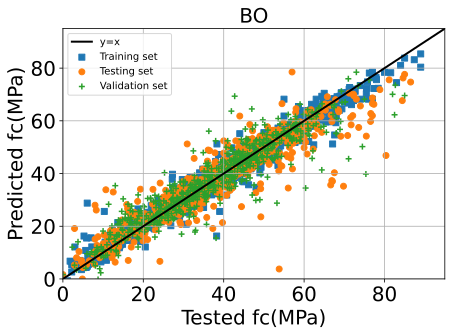

In [3]:
import matplotlib.pyplot as plt

xx = np.linspace(0, 100, 10)
yy = xx

plt.figure()
plt.plot(xx, yy, c='k', linewidth=2)
plt.scatter(y_train, Z_train, marker='s')
plt.scatter(y_test, Z_test, marker='o')
plt.scatter(y_validation, Z_validation, marker='+')

plt.grid()
plt.legend(['y=x', 'Training set', 'Testing set','Validation set'], loc = 'upper left')
plt.tick_params (axis = 'both', which = 'major')
plt.axis('tight')
plt.xlabel('Tested fc(MPa)', fontsize=20)
plt.ylabel('Predicted fc(MPa)', fontsize=20)
plt.xlim([0, 95])
plt.ylim([0, 95])
plt.title('BO', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('BO.svg',dpi=300,bbox_inches="tight")
plt.show()

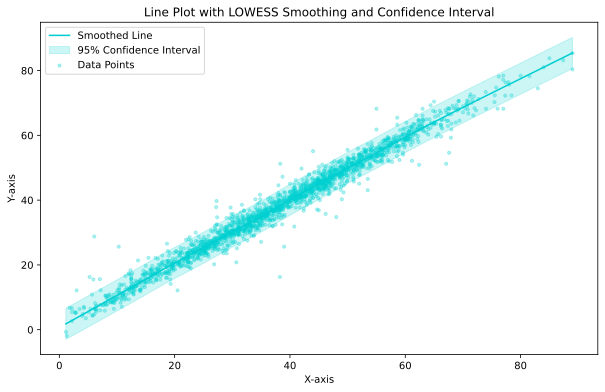

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
data = pd.DataFrame({'x': y_train, 'y': Z_train})

lowess = sm.nonparametric.lowess
smoothed = lowess(Z_train, y_train, frac=0.2)
x_smooth = smoothed[:, 0]
y_smooth = smoothed[:, 1]

residuals = Z_train - np.interp(y_train, x_smooth, y_smooth)
std_error = np.std(residuals)
ci = 1.96 * std_error  # 95% 置信区间

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, label='Smoothed Line', color='#00CED1')
plt.fill_between(x_smooth, y_smooth - ci, y_smooth + ci, color='#00CED1', alpha=0.2, label='95% Confidence Interval')
plt.scatter(y_train, Z_train, color='#00CED1', s=10, alpha=0.3, label='Data Points', marker='o')

# 设置图形标题和标签
plt.title('Line Plot with LOWESS Smoothing and Confidence Interval')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# 显示图形
plt.savefig('BO1.svg',dpi=300,bbox_inches="tight")
plt.show()

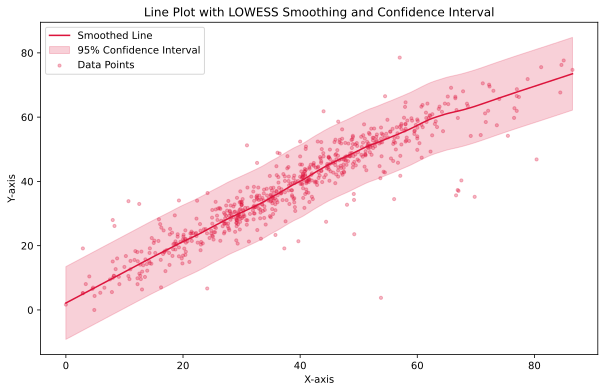

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
data = pd.DataFrame({'x': y_test, 'y': Z_test})

lowess = sm.nonparametric.lowess
smoothed = lowess(Z_test, y_test, frac=0.2)
x_smooth = smoothed[:, 0]
y_smooth = smoothed[:, 1]

residuals = Z_test - np.interp(y_test, x_smooth, y_smooth)
std_error = np.std(residuals)
ci = 1.96 * std_error  # 95% 置信区间

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, label='Smoothed Line', color='#DC143C')
plt.fill_between(x_smooth, y_smooth - ci, y_smooth + ci, color='#DC143C', alpha=0.2, label='95% Confidence Interval')
plt.scatter(y_test, Z_test, color='#DC143C', s=10, alpha=0.3, label='Data Points', marker='o')

# 设置图形标题和标签
plt.title('Line Plot with LOWESS Smoothing and Confidence Interval')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# 显示图形
plt.savefig('BO2.svg',dpi=300,bbox_inches="tight")
plt.show()

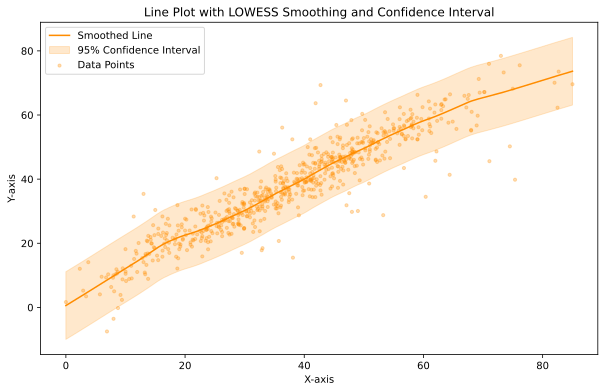

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
data = pd.DataFrame({'x': y_validation, 'y': Z_validation})

lowess = sm.nonparametric.lowess
smoothed = lowess(Z_validation, y_validation, frac=0.2)
x_smooth = smoothed[:, 0]
y_smooth = smoothed[:, 1]

residuals = Z_validation - np.interp(y_validation, x_smooth, y_smooth)
std_error = np.std(residuals)
ci = 1.96 * std_error  # 95% 置信区间

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, label='Smoothed Line', color='#FF8C00')
plt.fill_between(x_smooth, y_smooth - ci, y_smooth + ci, color='#FF8C00', alpha=0.2, label='95% Confidence Interval')
plt.scatter(y_validation, Z_validation, color='#FF8C00', s=10, alpha=0.3, label='Data Points', marker='o')

# 设置图形标题和标签
plt.title('Line Plot with LOWESS Smoothing and Confidence Interval')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# 显示图形
plt.savefig('BO3.svg',dpi=300,bbox_inches="tight")
plt.show()